In [1]:
# mount google drive and copy module file to temp location
# from google.colab import drive
# drive.mount('/content/drive')

# !pwd
# ! cp /content/drive/MyDrive/data_science/bootcamp/projects/project4-team1/config.py /content/config.py

In [2]:
import pandas as pd
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt

from sqlalchemy import create_engine, ForeignKey, Column, String, Integer, Text, Boolean, Float
from sqlalchemy.ext.declarative import declarative_base

# Saved password in config file which will be gitignored
from config import pw

import warnings
warnings.filterwarnings('ignore')

In [3]:
# when dealing with locally saved files

credit_record_file = "Resources/credit_record.csv"
application_record_file = "Resources/application_record.csv"

# credit_record_file = "https://drive.google.com/uc?id=1hMFACqanOmpN1mr0ih0q_HWz9NCfFCiJ"
# application_record_file = "https://drive.google.com/uc?id=1hNo2LY0BOGwk6aqBnBFh3ZvHoXBLiUoY"

credit_record = pd.read_csv(credit_record_file)
application_record = pd.read_csv(application_record_file)

In [4]:
credit_record_df = credit_record.copy()
credit_record_df.index.name = 'CR_ID'
credit_record_df.reset_index(inplace=True)

credit_record_df['STATUS'].unique()
credit_record_df.head()


,CR_ID,ID,MONTHS_BALANCE,STATUS
0,0,5001711,0,X
1,1,5001711,-1,0
2,2,5001711,-2,0
3,3,5001711,-3,0
4,4,5001712,0,C


In [5]:
application_record_df = application_record.copy()
application_record_df.index.name = 'AR_ID'
application_record_df.reset_index(inplace=True)

application_record_df.head()

,AR_ID,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


## Loading Data Frames into DB as Tables

In [6]:
protocol = 'postgresql'
username = 'postgres'
password = pw
host = 'localhost'
port = 5432
database_name = 'creditCheck_db'
rds_connection_string = f'{protocol}://{username}:{password}@{host}:{port}/{database_name}'
engine = create_engine(rds_connection_string)

Base = declarative_base()

In [7]:
# Check for existing tables before creation
engine.table_names()

[]

### Credit Record prep for DB load

In [8]:
print(credit_record_df.columns.tolist())

['CR_ID', 'ID', 'MONTHS_BALANCE', 'STATUS']


In [9]:
# checking datatypes for schema creation
credit_record_df.dtypes

CR_ID              int64
ID                 int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object

In [10]:
# Creating poke table
class credit_record(Base):
    extend_existing=True
    __tablename__ = "credit_record"
    
    cr_id = Column("CR_ID", Integer, primary_key = True)
    id_ = Column("ID", Integer)
    month_balance = Column("MONTHS_BALANCE", Integer)
    status = Column("STATUS", String)

### Application Record prep for DB load

In [11]:
print(application_record_df.columns.tolist())

['AR_ID', 'ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS']


In [12]:
# checking datatypes for schema creation
application_record_df.dtypes

AR_ID                    int64
ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

In [13]:
# Creating poke table
class application_record(Base):
    extend_existing=True
    __tablename__ = "application_record"
    
    ar_id = Column("AR_ID", Integer, primary_key = True)
    id_ = Column("ID", Integer)
    code_gender = Column("CODE_GENDER", String)
    flag_own_car = Column("FLAG_OWN_CAR", String)
    flag_own_realty = Column("FLAG_OWN_REALTY", String)
    cnt_children = Column("CNT_CHILDREN", Integer)
    amt_income_total = Column("AMT_INCOME_TOTAL", Float)
    name_income_type = Column("NAME_INCOME_TYPE", String)
    name_education_type = Column("NAME_EDUCATION_TYPE", String)
    name_family_status = Column("NAME_FAMILY_STATUS", String)
    name_housing_type = Column("NAME_HOUSING_TYPE", String)
    days_birth = Column("DAYS_BIRTH", Integer)
    days_employed = Column("DAYS_EMPLOYED", Integer)
    flag_mobil = Column("FLAG_MOBIL", Integer)
    flag_work_phone = Column("FLAG_WORK_PHONE", Integer)
    flag_phone = Column("FLAG_PHONE", Integer)
    flag_email = Column("FLAG_EMAIL", Integer)
    occupation_type = Column("OCCUPATION_TYPE", String)
    cnt_fam_members = Column("CNT_FAM_MEMBERS", Float)
    

In [14]:
Base.metadata.create_all(bind = engine)

In [15]:
engine.table_names()

['credit_record', 'application_record']

In [16]:
credit_record_df.to_sql(name='credit_record', con=engine, if_exists='append', index=False)

575

In [17]:
application_record_df.to_sql(name='application_record', con=engine, if_exists='append', index=False)

557

In [18]:
pd.read_sql_query('SELECT * FROM application_record', con=engine).head()

,AR_ID,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,None,2.0
1,1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,None,2.0
2,2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


## Credit Record Engineering

In [19]:
credit_record_df.head()

,CR_ID,ID,MONTHS_BALANCE,STATUS
0,0,5001711,0,X
1,1,5001711,-1,0
2,2,5001711,-2,0
3,3,5001711,-3,0
4,4,5001712,0,C


In [20]:
credit_record_df.isnull().values.any()

False

In [21]:
print(credit_record_df.STATUS.unique())

['X' '0' 'C' '1' '2' '3' '4' '5']


In [22]:
# Since the "X" value signifies "No loan for the month", this can be counted as irrelevant 
# to whether or not they defaulted and if used could create bias
# There are a lot of account numbers with a month_balances with corresponding status labeled as "X" so can't be used
credit_record_df.drop(credit_record_df[credit_record_df["STATUS"] == "X"].index, inplace = True)
credit_record_df.head()

,CR_ID,ID,MONTHS_BALANCE,STATUS
1,1,5001711,-1,0
2,2,5001711,-2,0
3,3,5001711,-3,0
4,4,5001712,0,C
5,5,5001712,-1,C


In [23]:
# Replace categorical credit status values with binary values
credit_record_df = credit_record_df.apply(lambda x: x.replace({'C': 0, '0' : 0, '1' : 1, '2' : 1, '3' : 1, '4' : 1, '5' : 1}, regex=True))
display(credit_record_df['STATUS'].head())
display(credit_record_df['STATUS'].value_counts())

1    0
2    0
3    0
4    0
5    0
Name: STATUS, dtype: int64

0    825151
1     14194
Name: STATUS, dtype: int64

In [24]:
credit_record_df.tail()

,CR_ID,ID,MONTHS_BALANCE,STATUS
1048570,1048570,5150487,-25,0
1048571,1048571,5150487,-26,0
1048572,1048572,5150487,-27,0
1048573,1048573,5150487,-28,0
1048574,1048574,5150487,-29,0


In [25]:
credit_record_df = credit_record_df['STATUS'].groupby(credit_record_df['ID']).mean().reset_index()

In [26]:
credit_record_df = pd.DataFrame(credit_record_df)

In [27]:
credit_record_df.head()

,ID,STATUS
0,5001711,0.000000
1,5001712,0.000000
2,5001717,0.000000
3,5001718,0.068966
4,5001719,0.000000


In [28]:
credit_record_df["STATUS"].describe()

count    41449.000000
mean         0.018547
std          0.075085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: STATUS, dtype: float64

In [29]:
# Replace float values with binaries
credit_record_df["Status2"] = credit_record_df["STATUS"].apply(lambda x: 1 if x > 0 else 0)
credit_record_df.rename(columns = {"STATUS" : "MONTH_BAL_AVG", "Status2" : "STATUS"}, inplace = True)
credit_record_df = credit_record_df.drop(columns="MONTH_BAL_AVG", axis=1)

credit_record_df.head()

,ID,STATUS
0,5001711,0
1,5001712,0
2,5001717,0
3,5001718,1
4,5001719,0


In [30]:
print(f"Good Credit: {len(credit_record_df[credit_record_df['STATUS'] == 0])}")
print(f"Bad Credit: {len(credit_record_df[credit_record_df['STATUS'] == 1])}")

Good Credit: 36099
Bad Credit: 5350


## Application records data Engineering

In [31]:
application_record_df.isnull().values.any()

True

In [32]:
application_record_df.shape

(438557, 19)

In [33]:
# Renaming all nan values of occupation type as Other
application_record_df.OCCUPATION_TYPE.replace(np.nan, 'Other', inplace = True)
application_record_df.OCCUPATION_TYPE.value_counts()

Other                    134203
Laborers                  78240
Core staff                43007
Sales staff               41098
Managers                  35487
Drivers                   26090
High skill tech staff     17289
Accountants               15985
Medicine staff            13520
Cooking staff              8076
Security staff             7993
Cleaning staff             5845
Private service staff      3456
Low-skill Laborers         2140
Secretaries                2044
Waiters/barmen staff       1665
Realty agents              1041
HR staff                    774
IT staff                    604
Name: OCCUPATION_TYPE, dtype: int64

In [34]:
# Check datatypes 
application_record_df.dtypes

AR_ID                    int64
ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

In [35]:
# application_record.duplicated().count()
# application_record[application_record.duplicated()]
application_record_df.nunique()

AR_ID                  438557
ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            19
CNT_FAM_MEMBERS            13
dtype: int64

## Merging both datasets

In [36]:
# Merge the two datasets keeping only IDs common to both dataframes
full_df = application_record_df.merge(credit_record_df, on=['ID'], how='inner')
display(full_df.head().T)
full_df.shape

,0,1,2,3,4
AR_ID,0,1,2,3,5
ID,5008804,5008805,5008806,5008808,5008810
CODE_GENDER,M,M,M,F,F
FLAG_OWN_CAR,Y,Y,Y,N,N
FLAG_OWN_REALTY,Y,Y,Y,Y,Y
CNT_CHILDREN,0,0,0,0,0
AMT_INCOME_TOTAL,427500.0,427500.0,112500.0,270000.0,270000.0
NAME_INCOME_TYPE,Working,Working,Working,Commercial associate,Commercial associate
NAME_EDUCATION_TYPE,Higher education,Higher education,Secondary / secondary special,Secondary / secondary special,Secondary / secondary special
NAME_FAMILY_STATUS,Civil marriage,Civil marriage,Married,Single / not married,Single / not married


(33110, 20)

In [37]:
full_df['STATUS'].value_counts()

0    28819
1     4291
Name: STATUS, dtype: int64

### Dropping irrelevant AR_ID, ID values 

In [38]:
full_df = full_df.drop(columns=[full_df.columns[0], full_df.columns[1]])
full_df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Other,2.0,1
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Other,2.0,1
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0


In [39]:
full_df.to_csv("Output/pre_encoded.csv", index=False)

## Encoding Categorical columns

In [40]:
pre_encoded_df = pd.read_csv("Output/pre_encoded.csv")

In [41]:
pre_encoded_df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Other,2.0,1
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,Other,2.0,1
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0


In [42]:
# Get the list of all categorical columns
categorical_cols = pre_encoded_df.select_dtypes(exclude='number').columns.tolist()
categorical_cols

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE']

In [43]:
# list all unique values all categorical columns
for li in categorical_cols:
    print(f">>> {li} => {pre_encoded_df[li].unique()}\n  --------------------------------------------")

# print("\n____________________________\nCREDIT RECORD STATUS UNIQUE VALUES")

>>> CODE_GENDER => ['M' 'F']
  --------------------------------------------
>>> FLAG_OWN_CAR => ['Y' 'N']
  --------------------------------------------
>>> FLAG_OWN_REALTY => ['Y' 'N']
  --------------------------------------------
>>> NAME_INCOME_TYPE => ['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
  --------------------------------------------
>>> NAME_EDUCATION_TYPE => ['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
  --------------------------------------------
>>> NAME_FAMILY_STATUS => ['Civil marriage' 'Married' 'Single / not married' 'Separated' 'Widow']
  --------------------------------------------
>>> NAME_HOUSING_TYPE => ['Rented apartment' 'House / apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']
  --------------------------------------------
>>> OCCUPATION_TYPE => ['Other' 'Security staff' 'Sales staff' 'Accountants' 'Laborers'
 'Managers' 'Drive

In [44]:
categorical_cols_to_analyse = categorical_cols[3:]
print("columns to analyse =>", categorical_cols_to_analyse)

columns to analyse => ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE']


In [45]:
def grouped_bar(df_column, titl, plot_width, font_size=8):  
  unique_income_type = df_column.unique().tolist()
  lst = []
  for li in unique_income_type:
    zeros_ones = ""
    zeros_ones = Counter((pre_encoded_df.loc[df_column == li, 'STATUS']).tolist())
    lst.append(zeros_ones)

  heal = [i[0] for i in lst]
  unheal = [i[1] for i in lst]

  def perchealthy_unhealthy(heal, unheal):
    healthy = list(map(lambda x, y: (x/(x + y))*100, heal, unheal))
    unhealthy = list(map(lambda x, y: (y/(x + y))*100, heal, unheal))
    healthy.extend(unhealthy)
    return healthy

  def perc_healthy(heal, unheal):
    healthy = list(map(lambda x, y: (x/(x + y))*100, heal, unheal))
    return healthy

  def perc_unhealthy(heal, unheal):
    unhealthy = list(map(lambda x, y: (y/(x + y))*100, heal, unheal))
    return unhealthy

  fig, ax = plt.subplots(figsize=(plot_width, 4))
  x = np.arange(len(unique_income_type))  # the label locations
  width = 0.4  # the width of the bars

  b1 = ax.bar(x, [i[0] for i in lst], width=width, label="Good Credit")
  # b1 = ax.bar(x, perc_healthy(heal, unheal), width=width, label="Good Credit")
  b2 = ax.bar(x+ width, [i[1] for i in lst], width=width, label="Bad Credit")
  # b2 = ax.bar(x+ width, perc_unhealthy(heal, unheal), width=width, label="Bad Credit")
  ax.set_ylabel('Credit Status Counts')
  ax.set_title(titl)
  ax.set_xticks(x + width / 2)
  ax.set_xticklabels(unique_income_type)
  ax.legend(loc='upper right')
  # ax.set_ylim(0, 100)

  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_color('#DDDDDD')
  ax.tick_params(bottom=False, left=False)
  ax.set_axisbelow(True)
  ax.yaxis.grid(True, color='#EEEEEE')
  ax.xaxis.grid(False)
  plt.xticks(rotation = 80)
  
  print(perchealthy_unhealthy(heal, unheal))

  print(ax.patches)
  for i, bar in enumerate(ax.patches):
    
    bar_value = bar.get_height()
    text = '{:.2f}%'.format(perchealthy_unhealthy(heal, unheal)[i])
    text_x = bar.get_x() + bar.get_width() / 2
    text_y = bar.get_y() + bar_value
    bar_color = bar.get_facecolor()
    ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color, size=font_size) 

  plt.show()

[87.22843590794636, 85.83977972990691, 88.6198975083937, 85.92836257309942, 90.9090909090909, 12.771564092053639, 14.16022027009309, 11.38010249160629, 14.071637426900585, 9.090909090909092]
<Axes.ArtistList of 10 patches>


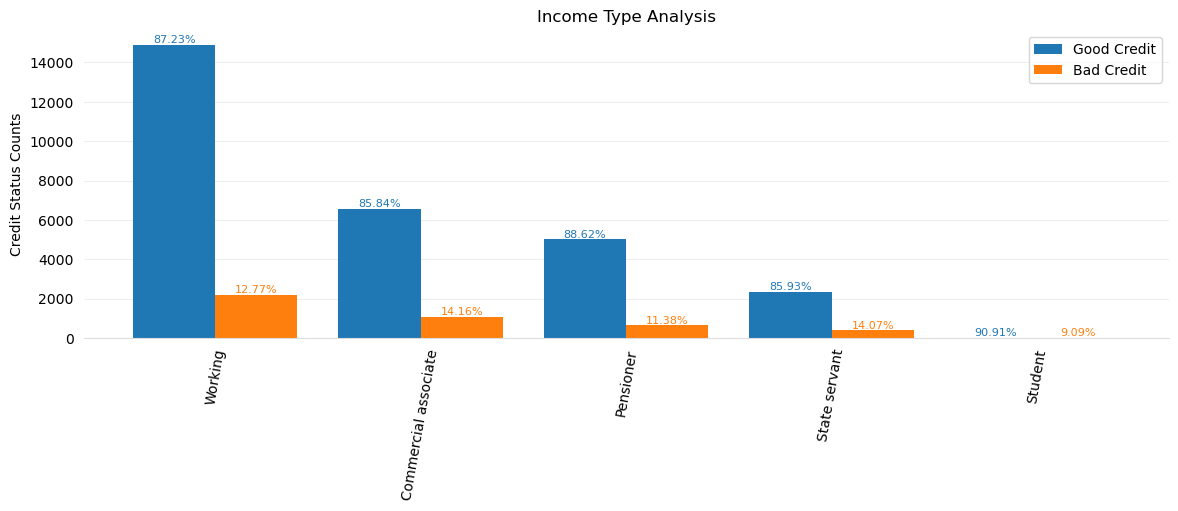

In [46]:
grouped_bar(pre_encoded_df["NAME_INCOME_TYPE"], 'Income Type Analysis', 14) 

[87.08806658418625, 87.1863084153587, 83.97832817337462, 88.66279069767442, 75.86206896551724, 12.911933415813746, 12.813691584641305, 16.021671826625386, 11.337209302325581, 24.137931034482758]
<Axes.ArtistList of 10 patches>


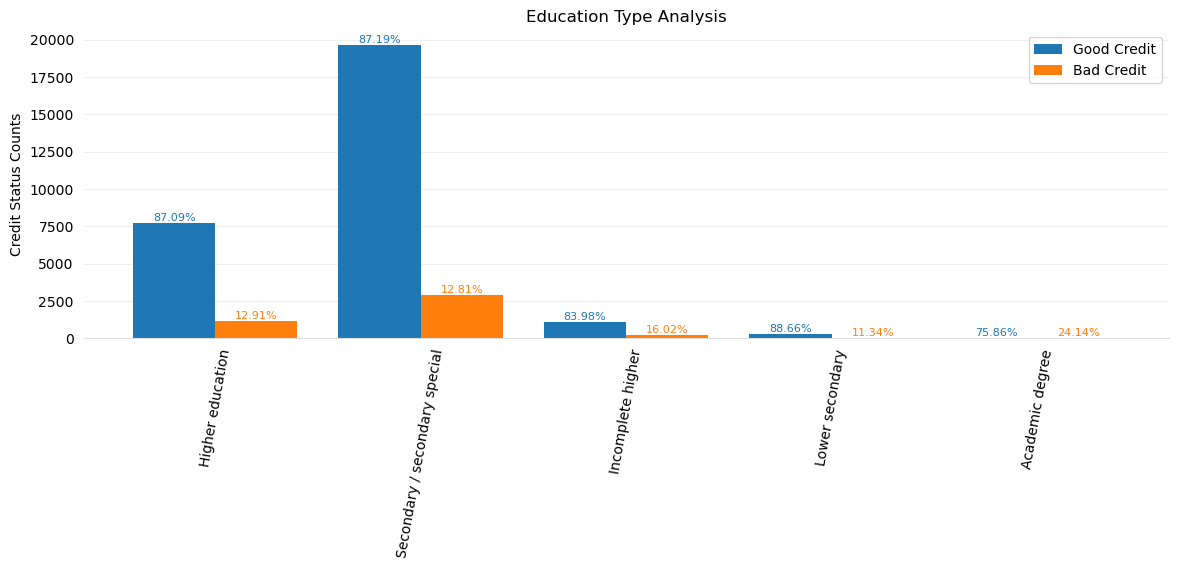

In [47]:
grouped_bar(pre_encoded_df["NAME_EDUCATION_TYPE"], 'Education Type Analysis', 14)

[86.18222891566265, 87.17711771177117, 85.94631175276336, 88.20754716981132, 88.32853025936599, 13.817771084337348, 12.822882288228824, 14.053688247236634, 11.79245283018868, 11.671469740634006]
<Axes.ArtistList of 10 patches>


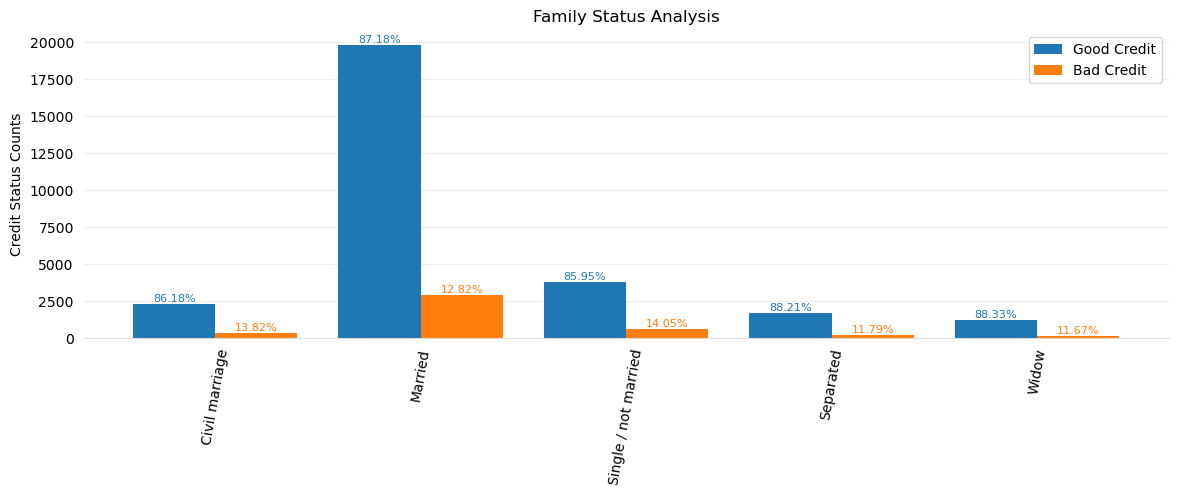

In [48]:
grouped_bar(pre_encoded_df["NAME_FAMILY_STATUS"], 'Family Status Analysis', 14)

[85.07462686567165, 87.21390175462321, 85.22167487684729, 85.79474342928661, 90.0, 84.29752066115702, 14.925373134328357, 12.786098245376786, 14.77832512315271, 14.205256570713393, 10.0, 15.702479338842975]
<Axes.ArtistList of 12 patches>


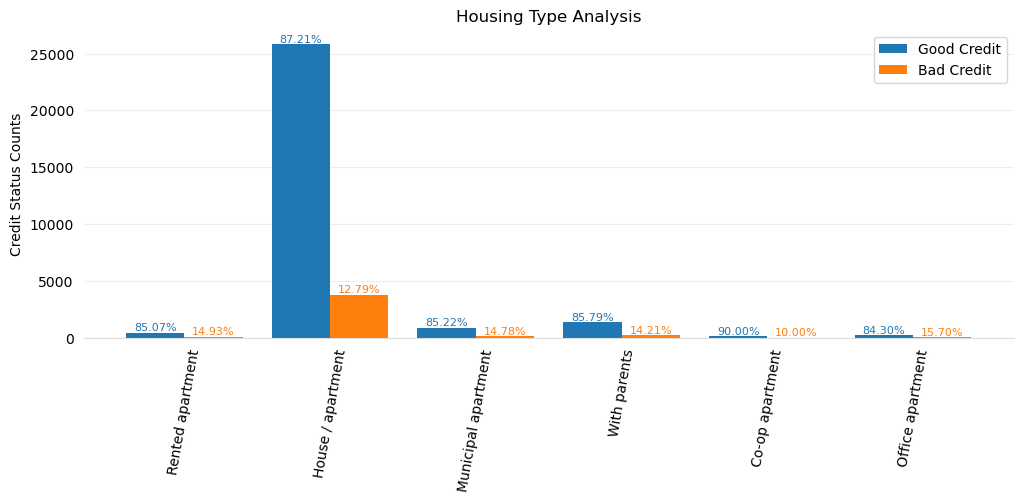

In [49]:
grouped_bar(pre_encoded_df["NAME_HOUSING_TYPE"], 'Housing Type Analysis', 12)

[88.41222404318904, 83.36380255941499, 87.67427122940431, 86.70886075949366, 86.96661310480272, 85.52875695732838, 86.34953464322648, 85.75384615384615, 85.73680063041765, 87.67123287671232, 85.34923339011925, 79.24528301886792, 85.4982206405694, 92.4914675767918, 90.84507042253522, 88.34355828220859, 81.57894736842105, 80.7017543859649, 85.07462686567165, 11.587775956810951, 16.63619744058501, 12.325728770595692, 13.291139240506327, 13.033386895197285, 14.471243042671613, 13.650465356773525, 14.246153846153847, 14.263199369582349, 12.32876712328767, 14.65076660988075, 20.754716981132077, 14.501779359430605, 7.508532423208192, 9.15492957746479, 11.65644171779141, 18.421052631578945, 19.298245614035086, 14.925373134328357]
<Axes.ArtistList of 38 patches>


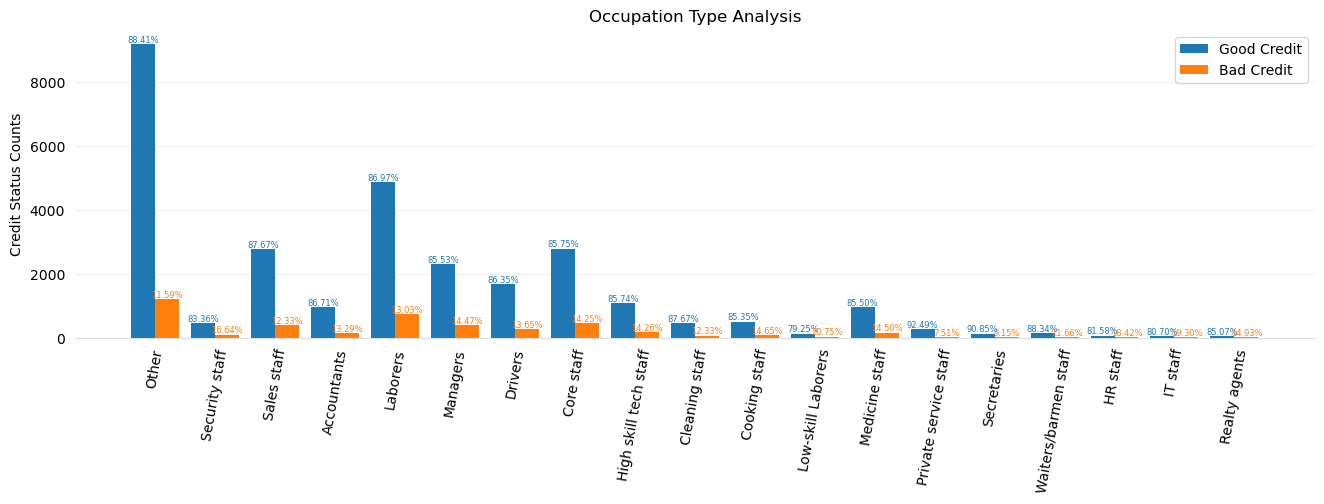

In [50]:
grouped_bar(pre_encoded_df["OCCUPATION_TYPE"], 'Occupation Type Analysis', 16, 6)

In [51]:
# Encoding NAME_INCOME_TYPE column
name_income_type_mapper = {'Working': 2, 'Commercial associate': 2, 'Pensioner': 1, 'State servant': 3, 'Student': 0}
pre_encoded_df["NAME_INCOME_TYPE"] = pre_encoded_df["NAME_INCOME_TYPE"].replace(name_income_type_mapper)

#  Encoding NAME_EDUCATION_TYPE column
name_education_type_mapper = {'Higher education': 3, 'Secondary / secondary special': 1, 'Incomplete higher': 2,
 'Lower secondary': 0, 'Academic degree': 3}
pre_encoded_df["NAME_EDUCATION_TYPE"] = pre_encoded_df["NAME_EDUCATION_TYPE"].replace(name_education_type_mapper)

#  Encoding NAME_FAMILY_STATUS column
name_family_status_mapper = {'Civil marriage': 3, 'Married': 4, 'Single / not married': 0, 'Separated': 1, 'Widow': 2}
pre_encoded_df["NAME_FAMILY_STATUS"] = pre_encoded_df["NAME_FAMILY_STATUS"].replace(name_family_status_mapper)

#  Encoding NAME_HOUSING_TYPE column
name_housing_type_mapper = {'Rented apartment': 1, 'House / apartment': 2, 'Municipal apartment': 1, 'With parents': 0, 
                            'Co-op apartment': 1, 'Office apartment': 1}
pre_encoded_df["NAME_HOUSING_TYPE"] = pre_encoded_df["NAME_HOUSING_TYPE"].replace(name_housing_type_mapper)

#  Encoding OCCUPATION_TYPE column
occupation_type_mapper = {'Other': 0, 'Security staff': 2, 'Sales staff': 3, 'Accountants': 6, 'Laborers': 1, 'Managers': 5, 'Drivers': 2,
                           'Core staff': 4, 'High skill tech staff': 6, 'Cleaning staff': 1, 'Private service staff': 4, 'Cooking staff': 3, 
                           'Low-skill Laborers': 0, 'Medicine staff': 6, 'Secretaries': 3, 'Waiters/barmen staff': 2, 'HR staff': 4, 
                           'Realty agents': 4, 'IT staff': 5}
pre_encoded_df["OCCUPATION_TYPE"] = pre_encoded_df["OCCUPATION_TYPE"].replace(occupation_type_mapper)

pre_encoded_df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS
0,M,Y,Y,0,427500.0,2,3,3,1,-12005,-4542,1,1,0,0,0,2.0,1
1,M,Y,Y,0,427500.0,2,3,3,1,-12005,-4542,1,1,0,0,0,2.0,1
2,M,Y,Y,0,112500.0,2,1,4,2,-21474,-1134,1,0,0,0,2,2.0,0
3,F,N,Y,0,270000.0,2,1,0,2,-19110,-3051,1,0,1,1,3,1.0,0
4,F,N,Y,0,270000.0,2,1,0,2,-19110,-3051,1,0,1,1,3,1.0,0


In [52]:
# Encoding binary categorical (CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY) variables using get_dummies
final_df = pd.get_dummies(pre_encoded_df)

# Move the status index to the end
final_df = final_df.reindex(columns = [col for col in final_df.columns if col != 'STATUS'] + ['STATUS'])
final_df.head().T

,0,1,2,3,4
CNT_CHILDREN,0.0,0.0,0.0,0.0,0.0
AMT_INCOME_TOTAL,427500.0,427500.0,112500.0,270000.0,270000.0
NAME_INCOME_TYPE,2.0,2.0,2.0,2.0,2.0
NAME_EDUCATION_TYPE,3.0,3.0,1.0,1.0,1.0
NAME_FAMILY_STATUS,3.0,3.0,4.0,0.0,0.0
NAME_HOUSING_TYPE,1.0,1.0,2.0,2.0,2.0
DAYS_BIRTH,-12005.0,-12005.0,-21474.0,-19110.0,-19110.0
DAYS_EMPLOYED,-4542.0,-4542.0,-1134.0,-3051.0,-3051.0
FLAG_MOBIL,1.0,1.0,1.0,1.0,1.0
FLAG_WORK_PHONE,1.0,1.0,0.0,0.0,0.0


In [53]:
print(f"Good Credit: {len(final_df[final_df['STATUS'] == 0])}")
print(f"Bad Credit: {len(final_df[final_df['STATUS'] == 1])}")

Good Credit: 28819
Bad Credit: 4291


In [54]:
final_df.to_csv("Output/full_data.csv", index=False)